In [80]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load 
whr ="whr_2016_cleaned.csv"
hdi = "HDI_Data_cleaned.csv"

# Read whr and hdi data
whr_df = pd.read_csv(whr)
hdi_df = pd.read_csv(hdi)

hdi_df = hdi_df[['Country', 'country code', 'HDI 2016']]

hdi_df.rename(
    columns={
        "country code": "Country_Code",
    },
    inplace=True)

whr_df.rename(
    columns={
        "country code": "Country_Code",
    },
    inplace=True)



In [84]:
# Combine the data into a single dataset
whr_df = whr_df[['Country', 'Country_Code', 'Happiness Rank']]

whr_df = whr_df[whr_df.Country_Code != '*unk']
hdi_df = hdi_df[hdi_df.Country_Code != '*unk']


whr_hdi_df = pd.merge(whr_df, hdi_df, how="inner", on=["Country_Code", "Country_Code"])

whr_hdi_df.rename(
    columns={
        "Country_x": "Country",
    },
    inplace=True)

whr_hdi_df = whr_hdi_df[['Country', 'Country_Code', 'Happiness Rank', 'HDI 2016']]

whr_hdi_df.to_csv('whr_hdi.csv')

# Display the data table for preview
whr_hdi_df.head()

,Country,Country_Code,Happiness Rank,HDI 2016
0,Denmark,DNK,1,0.928
1,Switzerland,CHE,2,0.943
2,Iceland,ISL,3,0.933
3,Norway,NOR,4,0.951
4,Finland,FIN,5,0.918


In [116]:
x_axis = whr_hdi_df["Happiness Rank"]
y_axis = whr_hdi_df ["HDI 2016"]

slope, intercept, r, p, std_err = stats.linregress(
    x_axis, y_axis)
fit = slope * x_axis + intercept

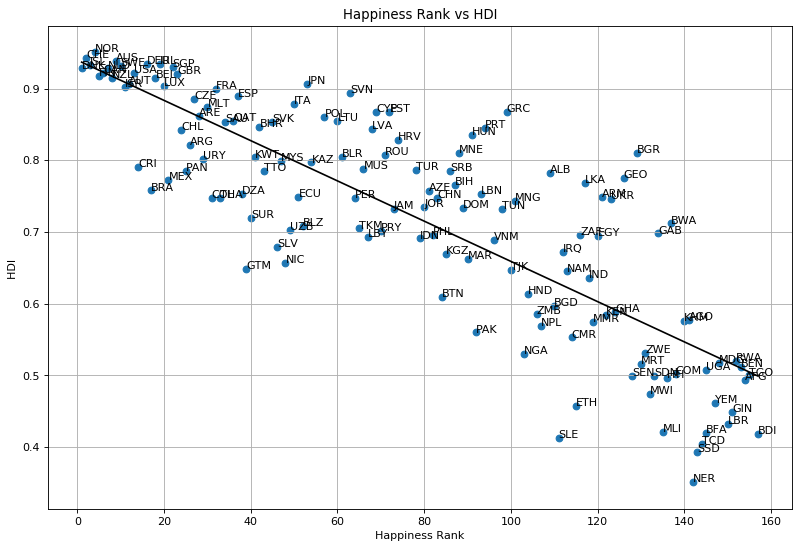

In [97]:
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(x_axis, y_axis, marker="o")
plt.plot(x_axis, fit, '-k')
plt.grid(True)

plt.title("Happiness Rank vs HDI")
plt.ylabel("HDI ")
plt.xlabel("Happiness Rank")

for i, txt in enumerate(x_axis):
    plt.annotate(whr_hdi_df["Country_Code"][i], (x_axis[i], y_axis[i]))

In [114]:
#Looking for the outliers
whr_hdi_df["Distance"] = whr_hdi_df["HDI 2016"] - fit
whr_hdi_df
#These should be happier!
whr_hdi_df.nlargest(5, ['Distance']) 

,Country,Country_Code,Happiness Rank,HDI 2016,Distance
110,Bulgaria,BGR,129,0.810,0.232264
85,Greece,GRC,99,0.868,0.206108
108,Georgia,GEO,126,0.776,0.189849
82,Portugal,PRT,94,0.845,0.169081
118,Botswana,BWA,137,0.712,0.156706


In [115]:
#These should be sadder!
whr_hdi_df.nsmallest(5, ['Distance']) 

,Country,Country_Code,Happiness Rank,HDI 2016,Distance
94,Sierra Leone,SLE,111,0.413,-0.215230
122,Niger,NER,142,0.351,-0.190268
36,Guatemala,GTM,39,0.649,-0.181206
98,Ethiopia,ETH,115,0.457,-0.160009
44,Nicaragua,NIC,48,0.657,-0.147959
